# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Get Data

In [9]:
# import the data from /content/filtered_frequent_buyers_v1.csv into a dataframe
df = pd.read_csv('/content/filtered_frequent_buyers_v1.csv')
df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,product_name,aisle_id,department_id,aisle,department
0,4,46842,1,0,178520,Plain Pre-Sliced Bagels,93,3,breakfast bakery,bakery
1,4,39758,3,1,178520,Chewy 25% Low Sugar Chocolate Chip Granola,3,19,energy granola bars,snacks
2,4,34862,8,1,178520,Tiny Twists Pretzels,107,19,chips pretzels,snacks
3,4,40285,9,1,178520,Traditional Snack Mix,125,19,trail mix snack mix,snacks
4,4,17616,10,1,178520,Goldfish Cheddar Baked Snack Crackers,78,19,crackers,snacks


# Graphs

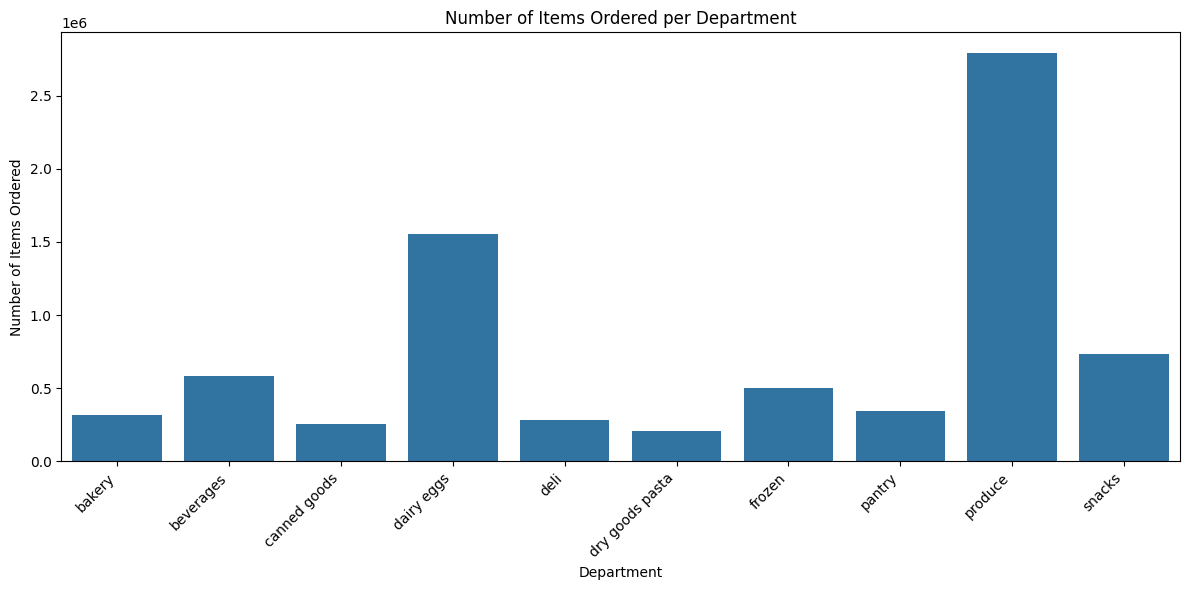

In [22]:
# Calculate the number of items ordered per department
department_orders = df.groupby('department')['order_id'].count().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='department', y='order_id', data=department_orders)
plt.xlabel('Department')
plt.ylabel('Number of Items Ordered')
plt.title('Number of Items Ordered per Department')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

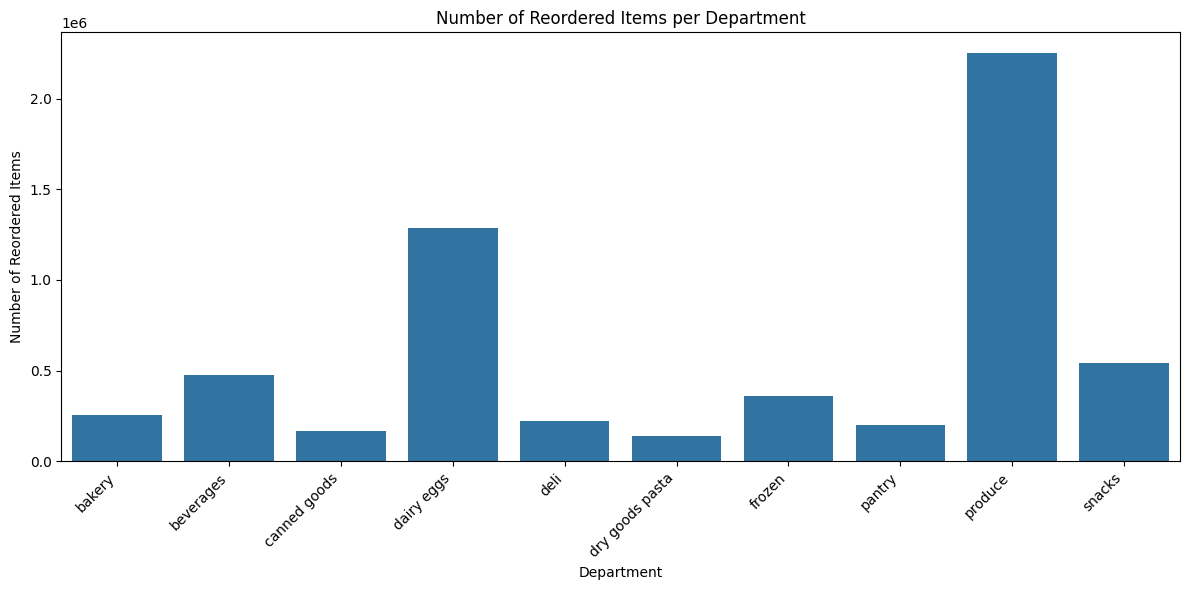

In [23]:
# Calculate the number of reordered items per department
department_reorders = df.groupby('department')['reordered'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='department', y='reordered', data=department_reorders)
plt.xlabel('Department')
plt.ylabel('Number of Reordered Items')
plt.title('Number of Reordered Items per Department')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

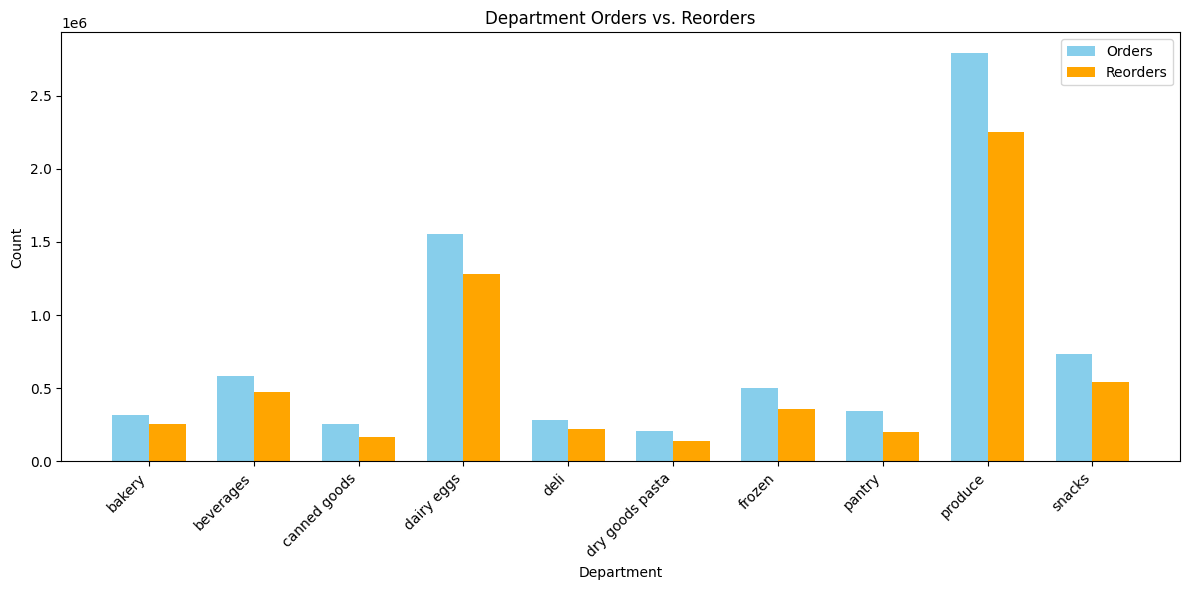

In [24]:
# Merge the two dataframes
department_orders_reorders = pd.merge(department_orders, department_reorders, on='department', how='inner')

# Create a bar plot with different colors for orders and reorders
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(department_orders_reorders['department']))

plt.bar(index, department_orders_reorders['order_id'], bar_width, label='Orders', color='skyblue')
plt.bar([i + bar_width for i in index], department_orders_reorders['reordered'], bar_width, label='Reorders', color='orange')

plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Department Orders vs. Reorders')
plt.xticks([i + bar_width / 2 for i in index], department_orders_reorders['department'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
# Group by product_id and sum the reordered column
product_reorders = df.groupby('product_name')['reordered'].sum().reset_index()

# Sort by reordered count in descending order and get the top 10
top_10_reorders = product_reorders.sort_values('reordered', ascending=False).head(10)

top_10_reorders

,product_name,reordered
480,Banana,122945
437,Bag of Organic Bananas,110189
5179,Organic Strawberries,90266
4679,Organic Hass Avocado,72265
4227,Organic Baby Spinach,66748
5007,Organic Raspberries,48232
5353,Organic Whole Milk,44632
4213,Organic Avocado,43279
3407,Limes,36757
3244,Large Lemon,36034


# Feature Engineering

In [28]:
# Feature 1: Count of how often a product is reordered
product_reorder_count = df.groupby('product_id')['reordered'].sum().reset_index()
product_reorder_count.columns = ['product_id', 'product_reorder_count']

In [30]:
# Feature 2: Count of how often a user reorders a product
user_product_reorder_count = df.groupby(['user_id', 'product_id'])['reordered'].sum().reset_index()
user_product_reorder_count.columns = ['user_id', 'product_id', 'user_product_reorder_count']

In [31]:
# Feature 3: Average number of products per order for a user
avg_products_per_order = df.groupby(['user_id', 'order_id']).size().reset_index(name='products_per_order')
avg_products_per_order = avg_products_per_order.groupby('user_id')['products_per_order'].mean().reset_index()
avg_products_per_order.columns = ['user_id', 'avg_products_per_order']

In [32]:
# Feature 4: Total number of unique products a user has ordered
unique_products_per_user = df.groupby('user_id')['product_id'].nunique().reset_index()
unique_products_per_user.columns = ['user_id', 'unique_products_per_user']

In [33]:
# Feature 5: Total number of orders per user
total_orders_per_user = df.groupby('user_id')['order_id'].nunique().reset_index()
total_orders_per_user.columns = ['user_id', 'total_orders_per_user']

In [34]:
# Feature 6: Total number of times a product has been ordered
product_order_count = df.groupby('product_id').size().reset_index(name='product_order_count')

In [35]:
# Feature 7: Average position in the cart for a product
avg_cart_position = df.groupby('product_id')['add_to_cart_order'].mean().reset_index()
avg_cart_position.columns = ['product_id', 'avg_cart_position']

In [36]:
# Merge all features into the main DataFrame
df = df.merge(product_reorder_count, on='product_id', how='left')
df = df.merge(user_product_reorder_count, on=['user_id', 'product_id'], how='left')
df = df.merge(avg_products_per_order, on='user_id', how='left')
df = df.merge(unique_products_per_user, on='user_id', how='left')
df = df.merge(total_orders_per_user, on='user_id', how='left')
df = df.merge(product_order_count, on='product_id', how='left')
df = df.merge(avg_cart_position, on='product_id', how='left')

In [37]:
# Display the final DataFrame with new features
print(df.head())

   order_id  product_id  add_to_cart_order  reordered  user_id  \
0         4       46842                  1          0   178520   
1         4       39758                  3          1   178520   
2         4       34862                  8          1   178520   
3         4       40285                  9          1   178520   
4         4       17616                 10          1   178520   

                                 product_name  aisle_id  department_id  \
0                     Plain Pre-Sliced Bagels        93              3   
1  Chewy 25% Low Sugar Chocolate Chip Granola         3             19   
2                        Tiny Twists Pretzels       107             19   
3                       Traditional Snack Mix       125             19   
4       Goldfish Cheddar Baked Snack Crackers        78             19   

                 aisle department  product_reorder_count  \
0     breakfast bakery     bakery                   1440   
1  energy granola bars     snacks     

# Split the data

In [39]:
# Split data into training and remaining datasets (40% train, 60% remaining)
train_df, remaining_df = train_test_split(df, train_size=0.4, random_state=42)

# Split the remaining data into production and temp datasets (66% production, 33% temp)
production_df, temp_df = train_test_split(remaining_df, train_size=0.666666, random_state=42)

# Split the temp data into test and validation datasets (50% test, 50% validation)
test_df, validation_df = train_test_split(temp_df, train_size=0.5, random_state=42)

# Print the shapes of the resulting datasets
print("Train dataset shape:", train_df.shape)
print("Production dataset shape:", production_df.shape)
print("Test dataset shape:", test_df.shape)
print("Validation dataset shape:", validation_df.shape)

Train dataset shape: (3035258, 17)
Production dataset shape: (3035254, 17)
Test dataset shape: (758816, 17)
Validation dataset shape: (758817, 17)
